# Python To Matlab

To initiate a call to a matlab function, one must first import the Matlab engine class.  This will instantiate an object which encapsulates a running Matlab session, which will be our interface to Matlab from Python.  It takes a few seconds for the instance of Matlab to fire up, but this is a once-per-session operation.

In [1]:
# Import the Matlab engine
import matlab.engine

In [2]:
# Import some other things we will need
import matlab.engine
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Fire up the Matlab Engine
eng = matlab.engine.start_matlab()

Matlab functions, both built-in and custom, can be called.  As long as the Matlab file that contains your function is on the path, it will be accessible to you.

In [4]:
# Add folder to the path
void = eng.addpath(os.getcwd() + os.sep + 'matlab')

Next, try calling a function or two.  To call a function, call it as a method of the "eng" object, using the '.' operator.  These functions are provided in the "matlab" directory.

In [5]:
val = eng.factorial(10)
print(val)

3628800


In [6]:
val = eng.fibonacci(10)
print(val)

55.0


### Image Processing Example
As a simple example, suppose we want to perform some image transformation using Matlab.  In this case, we will call a Matlab function that performs edge detection, and returns a result.  We will then plot the result in Python.  

First, plot the original image in Python.

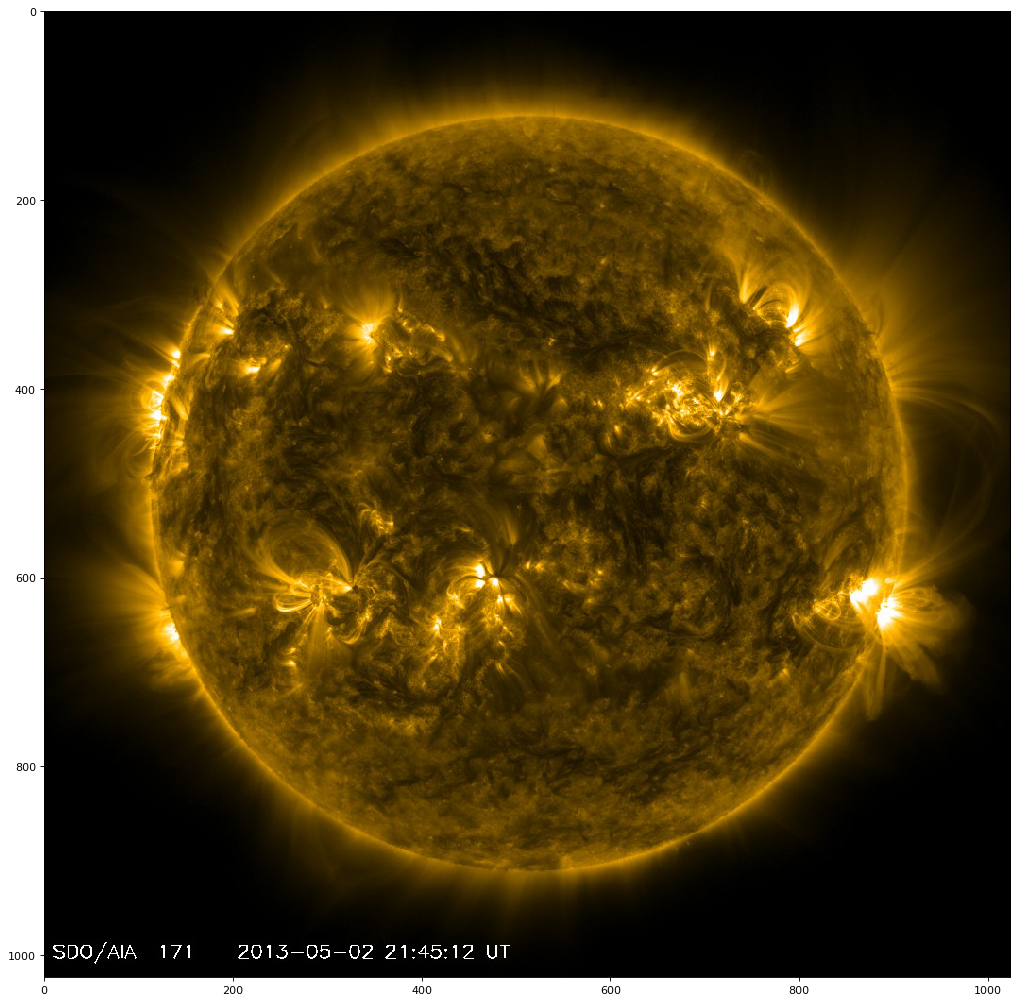

In [7]:
file = 'data' + os.sep + '20130502_214512_1024_0171.jpg'

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(Image.open(file))
plt.show()

Next call our Matlab function.

In [8]:
img = eng.edge_detect(file)

Convert the result to a numpy array

In [9]:
edge_img = np.array(img._data.tolist()).reshape(img.size)

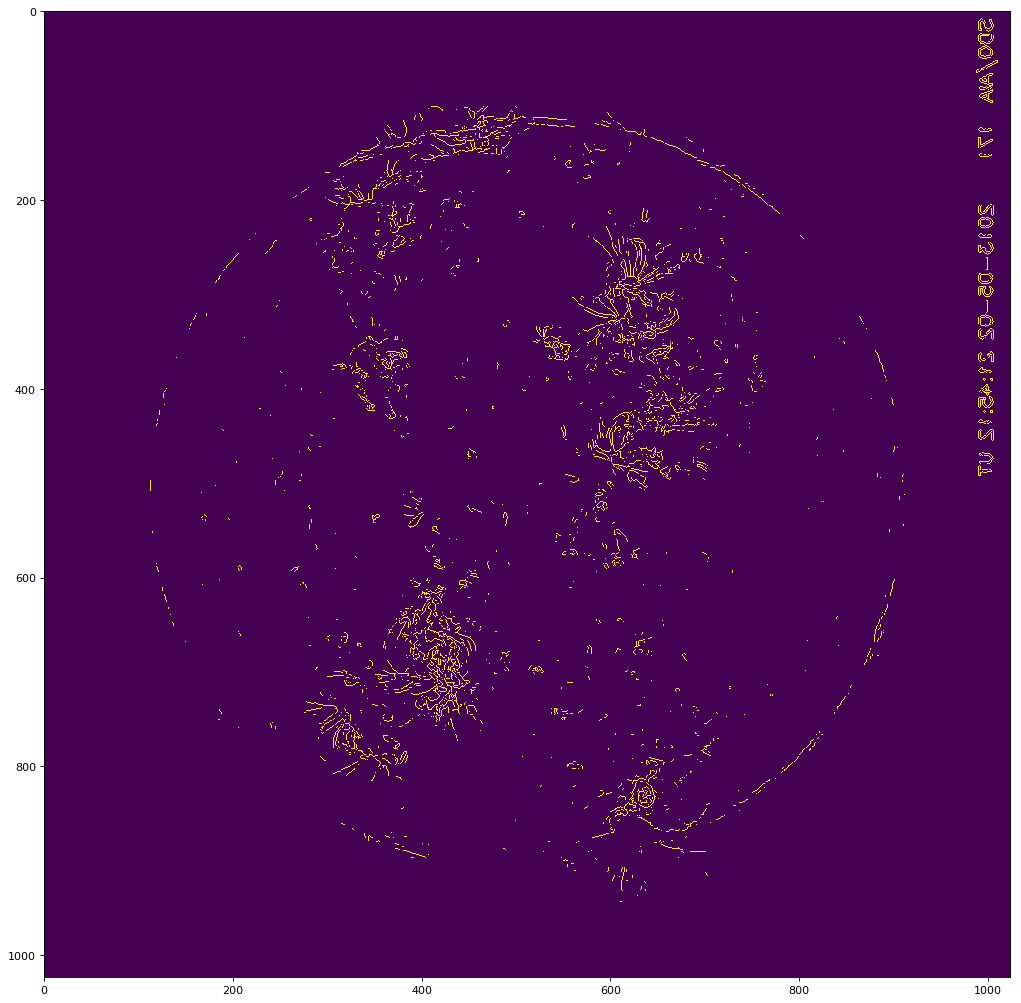

In [10]:

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(edge_img)
plt.show()

In [11]:
# Close the Matlab Engine
eng.quit()